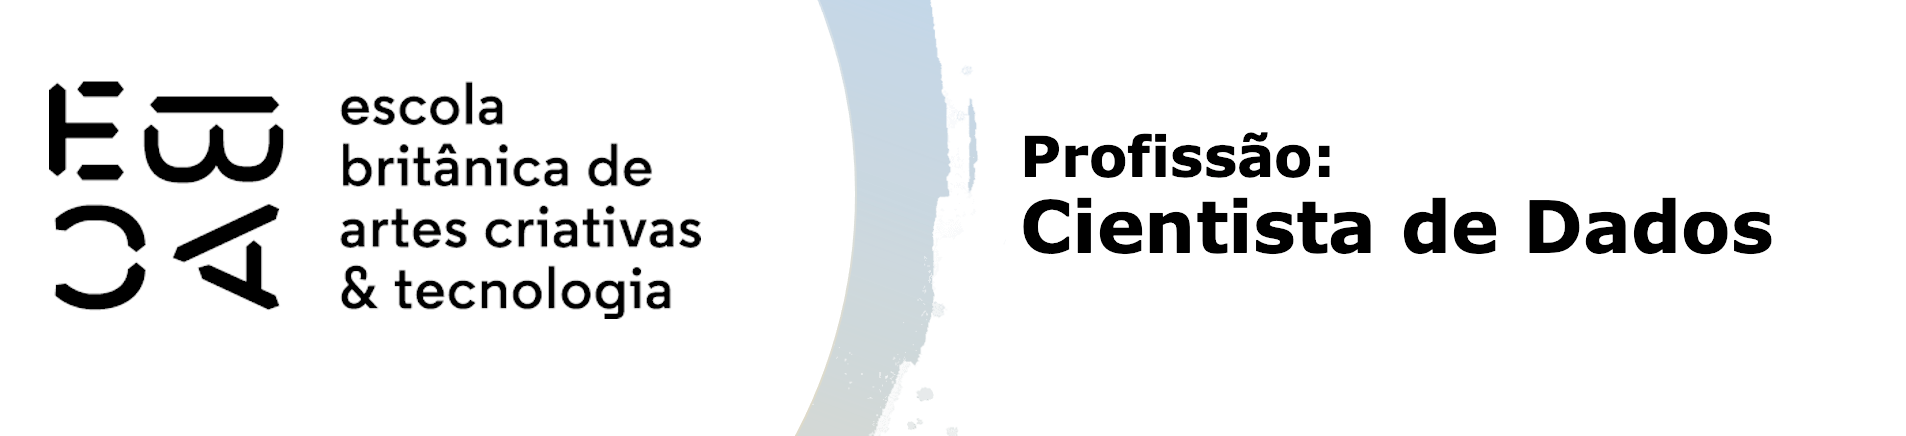

# Métodos hierárquicos de agrupamento - Tarefa

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [99]:
df_original = sns.load_dataset('penguins') # Carregando base dos penguins
df_original = df_original.dropna() # Removendo valores em branco
df = df_original.copy() # DataFrame que será alterado
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [100]:
print(f'{df.dtypes}\n\n') # Verificando os tipos dos dados
df = df.select_dtypes(include='number') # Deixando apenas os tipos numericos no DataFrame
print(df)
print(df.dtypes) # Verificando os tipos dos dados

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1          

In [101]:
scaler = StandardScaler() # Criando o objeto scaler para padronizar a média e desvio padrão
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # Alterando os valores do df para média 0 e desvio padrão 1
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [102]:
agrupamento_3 = AgglomerativeClustering(n_clusters=3) # Criando o objeto Agglomerative para 3 grupos
grupos_3 = agrupamento_3.fit_predict(df) # Treinando o objeto passando o DataFrame df
df['grupo'] = grupos_3 # Incluindo a coluna grupo que contem a representação dos grupos por grupos_3
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
0,-0.896042,0.780732,-1.426752,-0.568475,1
1,-0.822788,0.119584,-1.069474,-0.506286,1
2,-0.676280,0.424729,-0.426373,-1.190361,1
3,-1.335566,1.085877,-0.569284,-0.941606,1
4,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0
329,0.514098,-1.457000,1.002739,0.799674,0
330,1.173384,-0.744994,1.502928,1.919069,0
331,0.221082,-1.202712,0.788372,1.234995,0


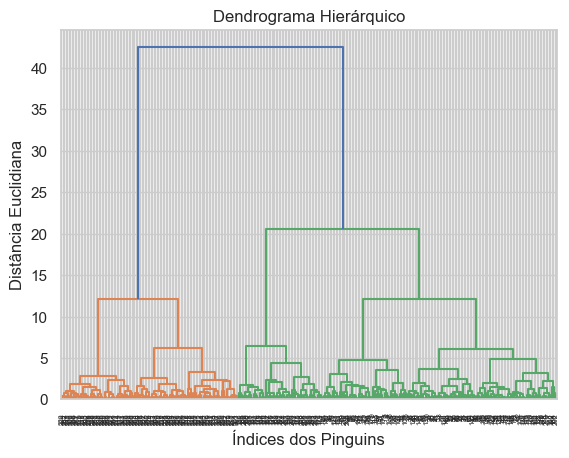

In [103]:
dendrograma = sch.dendrogram(sch.linkage(df, method='ward'))
# O parâmetro ward é como será definido o agrupamento, existem outros como complete, single, average...
# O ward tenta minimizar a soma dos quadrados do desvio padrão das variáveis em relação aos centroides

# Adicionando rótulos e exibindo o dendrograma
plt.title('Dendrograma Hierárquico') # Titulo do gráfico
plt.xlabel('Índices dos Pinguins') # Titulo do eixo X
plt.ylabel('Distância Euclidiana') # Titulo do eixo Y
plt.show()

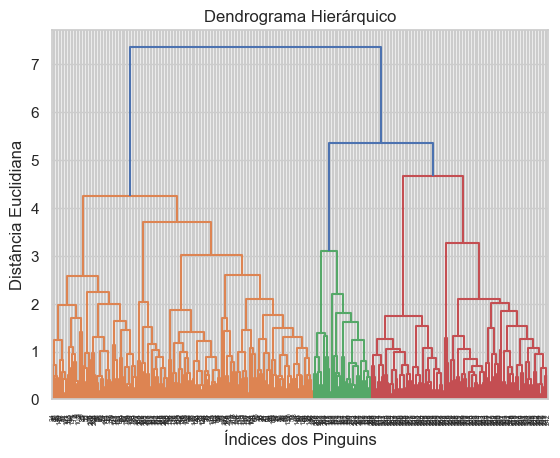

In [104]:
dendrograma = sch.dendrogram(sch.linkage(df, method='complete'))
# Escolhendo o método complete deu uma quantidade de grupos diferente, o método complete vai calcular
# a distância de cada ponto ao outro mais próximo e depois ao ponto do outro grupo e verificar se faz
# sentido que os pontos formem um grupo maior ou não.

# Adicionando rótulos e exibindo o dendrograma
plt.title('Dendrograma Hierárquico') # Titulo do gráfico
plt.xlabel('Índices dos Pinguins') # Titulo do eixo X
plt.ylabel('Distância Euclidiana') # Titulo do eixo Y
plt.show()

Anotações sobre ward e complete:

O método de Ward visa minimizar a variância total dentro dos clusters. Durante o processo de agrupamento, ele calcula a dissimilaridade entre dois clusters antes de mesclá-los. A dissimilaridade é medida pela diferença na variância total dos dados antes e depois da fusão dos clusters. Ele tenta manter os clusters compactos e de tamanhos semelhantes, buscando minimizar a variação interna.
<br>

O método de Complete (ligação completa) considera a dissimilaridade máxima entre dois clusters antes de mesclá-los. Ele calcula a distância entre os pontos mais distantes em dois clusters diferentes e usa essa distância máxima como critério para decidir a fusão. Esse método pode resultar em clusters de formas mais irregulares, pois ele é sensível à distância máxima entre pares de observações.

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [105]:
# O indice rand ajuda a verificar a semelhança entre species e grupo, para ver o quão bom foi separado os
#  grupos, sendo 1 perfeito e 0 tudo errado.
indice_rand_ajustado = adjusted_rand_score(df_original['species'], df['grupo'])
indice_rand_ajustado

0.9132403731145367

#### Verificando o total de valores de grupo e de espécie.

In [106]:
contagem_grupos = df['grupo'].value_counts()
print(f'TOTAL DE GRUPOS\n{contagem_grupos}\n\n')

contagem_especies = df_original['species'].value_counts()
print(f'TOTAL DE ESPECIES\n{contagem_especies}')

TOTAL DE GRUPOS
1    157
0    119
2     57
Name: grupo, dtype: int64


TOTAL DE ESPECIES
Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


#### Levando em consideração que a separação do grupo não usou rótulos, a divisão dos grupos foi muito boa, os erros acontecem ao classificar um pouco a mais os Adelie ao invés de classificar como Chinstrap.

In [107]:
# Criando uma nova cópia, já que o df está com os valores padronizados.
df_grupo = df_original.copy()
df_grupo['grupo'] = grupos_3

#### No gráfico a seguir é feito comparação da massa corporal dividida entre o grupo 0, 1 e 2 e as espécies Adelie, Chinstrap e Gentoo, fica bem visível que a divisão dos grupos e espécies bate com os resultados obtidos na contagem feita anteriormente.

C:\Users\Bill_\AppData\Local\Temp\ipykernel_11060\1114882168.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='grupo', y='body_mass_g', data=df_grupo, ci=None)
C:\Users\Bill_\AppData\Local\Temp\ipykernel_11060\1114882168.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='body_mass_g', data=df_grupo, ci=None)


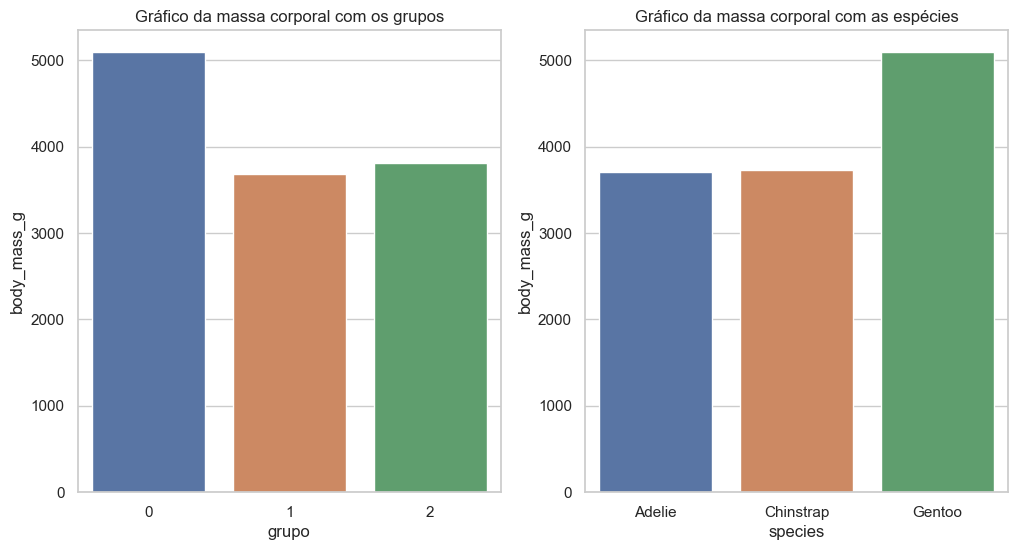

In [108]:
# Configurações visuais
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico para o DataFrame df_grupo
plt.subplot(1, 2, 1)
sns.barplot(x='grupo', y='body_mass_g', data=df_grupo, ci=None)
plt.title('Gráfico da massa corporal com os grupos')

# Gráfico para o DataFrame df_original
plt.subplot(1, 2, 2)
sns.barplot(x='species', y='body_mass_g', data=df_grupo, ci=None)
plt.title('Gráfico da massa corporal com as espécies')

# Exibindo os gráficos
plt.show()

#### Abaixo foi salvo as médias e variância das features por grupo, isso ajuda a entender a importância de cada feature na separação dos grupos, responder o que faz um gentoo ser um gentoo e as demais espécies.
<br>
<br>

#### Então o grupo 0 que são os Gentoo tem a menor largura do bico e a maior nadadeira e peso.
<br>

#### O grupo 1, que são os Adelie tem o menor comprimento do bico e uma nadadeira bem pequena se comparado com os demais, além da menor massa corporal.
<br>

#### Os Chinstrap são o grupo 2, eles tem o maior comprimento do bico e largura, mas em tamanho geral do corpo são menores que os Gentoo.
<br>

#### Lembrando que as comparações feitas abaixo foram usados os dados padronizados e uma comparação mais exata pede que seja usado os dados em sua grandeza real, então essas comparações é mais para ter uma noção de como as features estão ajudando a dividir os grupos.

In [109]:
# Calcular a média de cada feature por grupo
media_por_grupo = df.groupby('grupo').mean()

# Calcular a variância de cada feature por grupo
variancia_por_grupo = df.groupby('grupo').var()

# Exibir os resultados
print("Média por grupo:")
print(media_por_grupo)

print("\nVariância por grupo:")
print(variancia_por_grupo)

Média por grupo:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
grupo                                                               
0            0.654758      -1.102707           1.162463     1.101211
1           -0.879245       0.570499          -0.780920    -0.655420
2            1.054828       0.730767          -0.275940    -0.493739

Variância por grupo:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
grupo                                                               
0            0.323577       0.251457           0.221432     0.389029
1            0.289828       0.387347           0.216666     0.330364
2            0.246329       0.297584           0.217490     0.176999


In [110]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'grupo'],
      dtype='object')

## 3) Alterando o agrupamento

O Dendrogarma sugere que pode haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [111]:
# Removando a coluna grupo, que estava agrupando 3 grupos
df = df.drop('grupo', axis = 1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [112]:
agrupamento_5 = AgglomerativeClustering(n_clusters=5) # Criando o objeto Agglomerative para 5 grupos
grupos_5 = agrupamento_5.fit_predict(df) # Treinando o objeto passando o DataFrame df
df['grupo'] = grupos_5 # Incluindo a coluna grupo que contem a representação dos grupos por grupos_5
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
0,-0.896042,0.780732,-1.426752,-0.568475,2
1,-0.822788,0.119584,-1.069474,-0.506286,2
2,-0.676280,0.424729,-0.426373,-1.190361,2
3,-1.335566,1.085877,-0.569284,-0.941606,2
4,-0.859415,1.747026,-0.783651,-0.692852,4
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,3
329,0.514098,-1.457000,1.002739,0.799674,3
330,1.173384,-0.744994,1.502928,1.919069,1
331,0.221082,-1.202712,0.788372,1.234995,3


#### Dessa vez o dendograma usando o método ward acabou classificando em 3 grupos, bem parecido com o complete ao usar o DataFrame que tinha apenas 3 grupos.

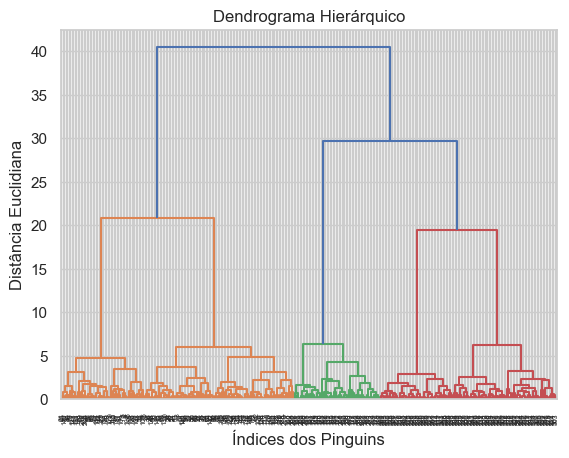

In [113]:
dendrograma = sch.dendrogram(sch.linkage(df, method='ward'))

# Adicionando rótulos e exibindo o dendrograma
plt.title('Dendrograma Hierárquico')
plt.xlabel('Índices dos Pinguins')
plt.ylabel('Distância Euclidiana')
plt.show()

#### Ao utilizar 5 grupos já na base de dados o critério de quebra mudou um pouco entre a distância 4 e 5, mas no final sempre acaba sendo sugerido o uso de 3 grupos.

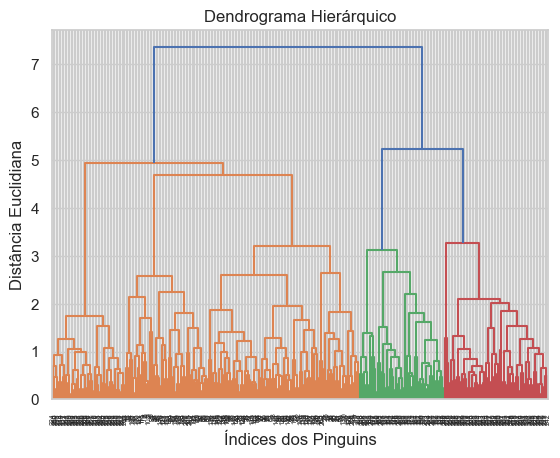

In [114]:
dendrograma = sch.dendrogram(sch.linkage(df, method='complete'))

# Adicionando rótulos e exibindo o dendrograma
plt.title('Dendrograma Hierárquico')
plt.xlabel('Índices dos Pinguins')
plt.ylabel('Distância Euclidiana')
plt.show()

In [127]:
# Criando novo DF, porque quando normalizou o indice foi alterado, então esse é original apenas incluindo
# a coluna grupo.
df_comparacao = df_original.copy()
df_comparacao['grupo'] = grupos_5
df_comparacao

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,4
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,3


In [130]:
# Agrupando grupo e espécie
grupo_species = df_comparacao.groupby(['grupo', 'species']).size().unstack().fillna(0)
grupo_species

species,Adelie,Chinstrap,Gentoo
grupo,,,
0,0.0,57.0,0.0
1,0.0,0.0,70.0
2,93.0,8.0,0.0
3,0.0,0.0,49.0
4,53.0,3.0,0.0


In [131]:
# Agrupando grupo e sexo
grupo_sexo = df_comparacao.groupby(['grupo', 'sex']).size().unstack().fillna(0)
grupo_sexo

sex,Female,Male
grupo,,
0,23.0,34.0
1,9.0,61.0
2,80.0,21.0
3,49.0,0.0
4,4.0,52.0


#### Ao separar em 5 clusters, foi capturado sim a divisão por sexo, o grupo 1 por exemplo tem 70 gentoo e 0 dos demais, enquanto no grupo 3 tem 49 gentoo e 0 dos demais, enquanto ao ver por sexo o grupo 1 tem 61 machos e 9 femeas, enquanto o grupo 3 tem 49 femeas, exatamente a mesma quantidade do agrupamento por espécie. Como foi colocado um número impar nem todos grupos foram separados, o grupo 0 por exemplo tentou ser exclusivamente de chinstrap.